Epoch [100/1000], Loss: 0.0631
Epoch [200/1000], Loss: 0.0361
Epoch [300/1000], Loss: 0.0227
Epoch [400/1000], Loss: 0.0153
Epoch [500/1000], Loss: 0.0114
Epoch [600/1000], Loss: 0.0092
Epoch [700/1000], Loss: 0.0080
Epoch [800/1000], Loss: 0.0074
Epoch [900/1000], Loss: 0.0070
Epoch [1000/1000], Loss: 0.0069


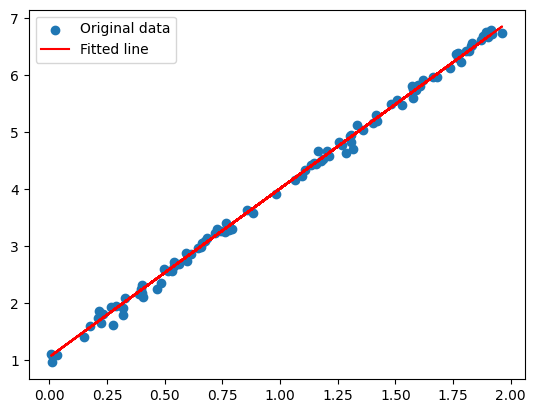

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data
torch.manual_seed(42)  # For reproducibility
X = 2 * torch.rand(100, 1)  # Random input values between 0 and 2
y = 3 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relationship with some noise

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)

    # Compute the loss
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), model(X).detach().numpy(), 'r', label='Fitted line')
plt.legend()
plt.show()
